# Eight Queens Genetic Algorithim

a) generate population

In [2]:
import random

def _generate_genotype(number_of_queens):
    return  [random.randrange(number_of_queens) for num in range(number_of_queens )]


def generate_population(number_of_queens=8, size_of_population=19):
        return [_generate_genotype(number_of_queens) for _ in range(size_of_population)]

generate_population(3, 3)

[[0, 2, 2], [1, 0, 1], [1, 2, 0]]

b) fitness function

In [3]:
def fitness_function(genotype):
    """finds a score based off the number of queens which are not being attacked
    """
    fitness_score = 0

    for i_p, phenotype in enumerate(genotype):
        for i_o_p, other_phenotype in enumerate(genotype):
            if phenotype == other_phenotype:
                # is on the same row
                continue
            if i_p - phenotype == i_o_p - other_phenotype:
                # is diagonally attacked
                continue
            if i_p + phenotype == i_o_p + other_phenotype:
                # is diagonally attacked
                continue
            fitness_score += 1
    
    return fitness_score / 2


assert fitness_function([7,1,4,2,0,6,3,5]) == 28
assert fitness_function([7,2,4,2,0,6,3,2]) == 23
assert fitness_function([1,1,1,1,0,6,3,2]) == 19
assert fitness_function([1,1,1,1,1,1,1,1]) == 0
assert fitness_function([1,2,3,4,5,6,7,8]) == 0

c)	selection:

In [4]:

def selection(population, fitness_scores, size_of_population):
    """return a list of selected pairs"""
    ### TODO if the fitness score is high they will always be selected
    ### should they only be chosen once
    ### or could use tournament selection
    ### book claims that they can be selecte multilpe times
    ### so should be fine, but maybe the weighted choice is too high
    ### leave this as is and look at tournament selection
    ### for optimisation
    ### https://brandinho.github.io/genetic-algorithm/

    selected = []
    for _ in range(size_of_population):
        parent_one = _random_weighted_choice(population, fitness_scores)
        parent_two = _random_weighted_choice(population, fitness_scores, selected=parent_one)

        selected.append((parent_one, parent_two))

    return selected


def _random_weighted_choice(population, weights, selected=None):
    """pick one from list proportional to weights"""

    if selected is not None:
        index = population.index(selected)
        population = population[:index] + population[index+1:]
        weights = weights[:index] + weights[index+1:]

    # avoid zero weights constraint
    if sum(weights) == 0.0:
        weights[0] = 0.1

    return random.choices(population, weights=weights, k=1)[0]

population = generate_population(3, 5)
fitness_scores = [fitness_function(genotype) for genotype in population]
print("initial populations:")
print(population)
print("fitness scores:")
print(fitness_scores)
print("selected parents")
selection(population, fitness_scores, 3)


initial populations:
[[2, 2, 2], [1, 2, 0], [0, 1, 1], [1, 0, 2], [1, 1, 2]]
fitness scores:
[0.0, 2.0, 1.0, 2.0, 1.0]
selected parents


[([0, 1, 1], [1, 0, 2]), ([1, 1, 2], [0, 1, 1]), ([0, 1, 1], [1, 2, 0])]

d)	Crossover

In [5]:

def crossover(selected_pairs, number_of_queens):

    offspring = []
    for s_p in selected_pairs:
        # generate random cross over points - 0 - max number of queens
        cross_over_index = random.randint(0, number_of_queens - 1)
        parent_one = s_p[0]
        parent_two = s_p[1]   

        child = _crssover(parent_one, parent_two, cross_over_index)
        offspring.append(child)

    return offspring


def _crssover(parent_one, parent_two, cross_over_index):
    return parent_one[:cross_over_index] + parent_two[cross_over_index:]


population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)

print("selected parents")
print(selected_parents)
print("offspring")

crossover(selected_parents, 3)

selected parents
[([0, 0, 1], [2, 2, 1]), ([0, 0, 1], [2, 2, 1]), ([0, 0, 1], [2, 2, 1])]
offspring


[[2, 2, 1], [0, 2, 1], [2, 2, 1]]

e)  mutation

In [6]:
import random


def _mutate(current_value, number_of_queens):
    new_value = current_value

    while new_value == current_value:
        new_value = random.randint(0, number_of_queens - 1)

    return new_value


def mutation(population, mutation_frequency, number_of_queens):        
    for genotype in population:
        for s_i,_ in enumerate(genotype):
            x = random.randint(1, mutation_frequency)
            if x == 1:
                genotype[s_i] = _mutate(genotype[s_i], number_of_queens)
    return population


population = generate_population(3, 3)
fitness_scores = [fitness_function(genotype) for genotype in population]
selected_parents = selection(population, fitness_scores, 3)
offspring = crossover(selected_parents, 3)
print("offspring")
print(offspring)
print("mutated")

mutation(population, 2, 3)

offspring
[[1, 0, 2], [0, 0, 0], [0, 0, 0]]
mutated


[[2, 1, 0], [1, 0, 0], [1, 2, 2]]

generation

In [20]:
def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    fit_scores = [fitness_function(genotype) for genotype in population]

    # c) selection
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    children = crossover(selected_pairs, number_of_queens)

    # e) mutation
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated, fit_scores

# a) Initial Population
population = generate_population(3, 3)
generation(population, 3, 3, 2)


([[0, 2, 2], [2, 2, 2], [0, 0, 1]], [0.0, 1.0, 0.0])

check for completion and calclate perfect score

In [21]:
from scipy import special

def check_for_perfect_genotype(population, fitness_scores, perfect_score):
    for i,score in enumerate(fitness_scores):
        if score == perfect_score:
            return population[i]

    return []

def calculate_perfect_score(number_of_queens):
    return special.comb(
                    number_of_queens,
                    2
                )


calculate_perfect_score(8)

28.0

Full algorithim

In [49]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=25
MUTATION_FREQUENCY = 8
# TODO HOW IS THIS CALCULATED
PERFECT_SCORE = calculate_perfect_score(NUMBER_OF_QUEENS)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_genotype = []

    # # g) check if it has found correct state and exit loop
    while not completed_genotype:
        population, fitness_scores = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_genotype = check_for_perfect_genotype(population, fitness_scores, PERFECT_SCORE)
        gen += 1

        # if gen % 5000 == 0:
        #     print("generated new population")
        #     population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)
        if gen == 100000:
            break
        # if gen % 1000 == 0:
        #     print(f"run for {gen} generations")

    stop_time = timeit.default_timer()

    print(f"elapsed_time: {stop_time - start_time}")
    print(f"number_of_generations: {gen}")
    print(f"completed_state: {completed_genotype}")
    print("=========================")

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_genotype
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result

elapsed_time: 4.325423700000101
number_of_generations: 1714
completed_state: [6, 7, 2, 2, 2, 7, 5, 1]


{'elapsed_time': 4.325423700000101,
 'number_of_generations': 1714,
 'completed_state': [6, 7, 2, 2, 2, 7, 5, 1]}

In [41]:
# # generate test population
# # only need to do this once

# import pickle

test_populations_name = 'test_populations_25'


# # generate test populations

# test_population = []

# for i in range(100):
#         test_population.append( generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION))

# with open(test_populations_name, 'wb') as f:
#         pickle.dump(test_population, f)

In [50]:
# run algo on all test populations

import pickle

with open(test_populations_name, 'rb') as f:
    test_population = pickle.load(f)

results = {
        "elapsed_time": [],
        "number_of_generations": [],
        "completed_state": []
}

for pop in test_population:

        ga_result = genetic_algorithm(population)

        results["elapsed_time"].append(ga_result["elapsed_time"])
        results["number_of_generations"].append(ga_result["number_of_generations"])
        results["completed_state"].append(ga_result["completed_state"])

results

elapsed_time: 4.677473399999144
number_of_generations: 2057
completed_state: [1, 1, 4, 4, 3, 7, 0, 3]
elapsed_time: 1.2287662999988243
number_of_generations: 612
completed_state: [6, 3, 4, 2, 4, 3, 1, 6]
elapsed_time: 18.520954699999493
number_of_generations: 11615
completed_state: [0, 2, 6, 6, 0, 2, 1, 7]
elapsed_time: 17.192460199999914
number_of_generations: 10541
completed_state: [5, 5, 0, 1, 6, 0, 6, 6]
elapsed_time: 2.7178936999989673
number_of_generations: 1638
completed_state: [4, 0, 3, 0, 2, 1, 3, 6]
elapsed_time: 8.188570099999197
number_of_generations: 5104
completed_state: [5, 6, 4, 5, 1, 4, 2, 5]
elapsed_time: 1.7106285999998363
number_of_generations: 1141
completed_state: [1, 2, 4, 2, 6, 4, 2, 5]
elapsed_time: 9.163900399998965
number_of_generations: 5533
completed_state: [6, 7, 3, 3, 5, 0, 4, 7]
elapsed_time: 5.42760570000064
number_of_generations: 3277
completed_state: [1, 4, 4, 7, 3, 5, 1, 1]
elapsed_time: 0.08645760000035807
number_of_generations: 59
completed_state: 

{'elapsed_time': [4.677473399999144,
  1.2287662999988243,
  18.520954699999493,
  17.192460199999914,
  2.7178936999989673,
  8.188570099999197,
  1.7106285999998363,
  9.163900399998965,
  5.42760570000064,
  0.08645760000035807,
  3.1252762000003713,
  2.580258400001185,
  9.40967079999973,
  4.272936500001379,
  0.4794899999997142,
  0.09363350000057835,
  1.3218964000006963,
  3.5084456999993563,
  6.66662130000077,
  6.147304500000246,
  0.2792980999984138,
  1.3320210999991104,
  2.0823409000004176,
  27.0442280999996,
  83.51179369999954,
  0.13402679999853717,
  1.1180462000011175,
  6.200424500000736,
  3.372113100000206,
  4.16420029999972,
  0.8341312000011385,
  3.713591499999893,
  5.515621200000169,
  0.47478079999928013,
  1.080738399999973,
  2.525170700000672,
  7.304698500000086,
  5.206762099998741,
  8.011547500000233,
  0.6487291000012192,
  1.711056699999972,
  0.9923111000007339,
  6.119943799998509,
  0.5874574000008579,
  2.1472107999998116,
  10.2537370999998

In [51]:
import os

unique_identifier = "100_results_no_reset_population"
parent_directory = "C:\\Users\\SAB68\\repos\\samsambutdifferent\\eight-queen-problem\\results\\"

path = os.path.join(parent_directory, unique_identifier)

if not os.path.exists(path):
    os.mkdir(path)

config = {
    "NUMBER_OF_QUEENS": NUMBER_OF_QUEENS,
    "SIZE_OF_POPULATION": SIZE_OF_POPULATION,
    "MUTATION_FREQUENCY": MUTATION_FREQUENCY,
    "perfect_score": PERFECT_SCORE
}

f = open(path + "\\config", "w")

for item in config.items():
    f.writelines(str(item) + '\n')
f.close()


In [52]:
import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()

print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")


f = open(path + "\\metrics", "w")
f.writelines(f"mean_number_of_generations: {mean_number_of_generations}" + '\n')
f.writelines(f"std_number_of_generations: {std_number_of_generations}" + '\n')
f.writelines(f"mean_elapsed_time: {mean_elapsed_time}" + '\n')
f.writelines(f"std_elapsed_time: {std_elapsed_time}" + '\n')
f.writelines('\n')
f.write(str(results_df))
f.close()


    elapsed_time  number_of_generations           completed_state
0       4.677473                   2057  [1, 1, 4, 4, 3, 7, 0, 3]
1       1.228766                    612  [6, 3, 4, 2, 4, 3, 1, 6]
2      18.520955                  11615  [0, 2, 6, 6, 0, 2, 1, 7]
3      17.192460                  10541  [5, 5, 0, 1, 6, 0, 6, 6]
4       2.717894                   1638  [4, 0, 3, 0, 2, 1, 3, 6]
..           ...                    ...                       ...
95      3.334591                   4209  [2, 5, 0, 6, 6, 1, 7, 1]
96      7.839700                  11391  [0, 1, 4, 1, 7, 2, 1, 0]
97      1.939923                   1663  [5, 2, 5, 6, 5, 3, 7, 7]
98      1.099395                   1502  [1, 2, 2, 0, 7, 7, 2, 1]
99      3.608157                   5316  [1, 3, 1, 6, 0, 0, 2, 5]

[100 rows x 3 columns]
mean_number_of_generations: 4933.75
std_number_of_generations: 6759.726967433109
mean_elapsed_time: 5.070897210000058
std_elapsed_time: 9.420892420736244


In [53]:
# check all results finish
results_df[results_df["elapsed_time"] > 30]

,elapsed_time,number_of_generations,completed_state
24,83.511794,42802,"[6, 4, 6, 5, 2, 7, 2, 0]"
83,34.441063,44121,"[5, 3, 1, 7, 7, 4, 4, 3]"


In [54]:
import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

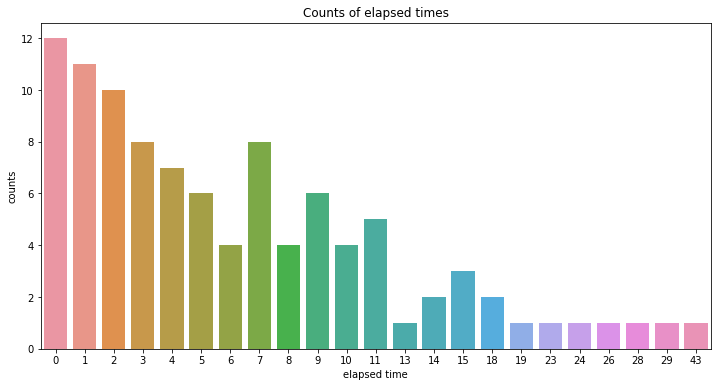

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig(path + '/counts_of_elapsed_time.png')
plt.show(fig)

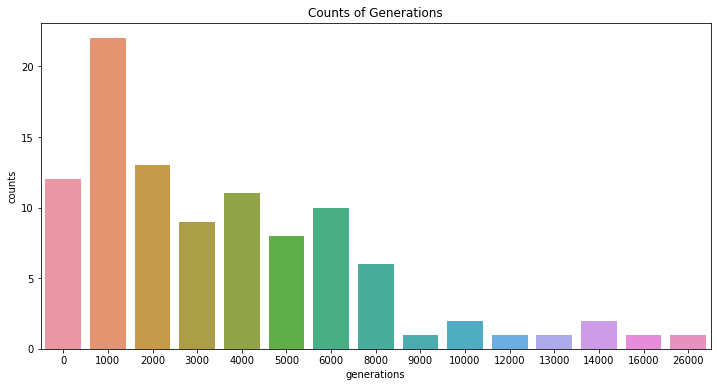

In [48]:
plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig(path + '/counts_of_generations.png')
plt.show(fig)